## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import time
import sys
# Import MainPackage
sys.path.append('../src_python')
from MainPackage import MixtureModelBernoulli

# Pre Cluster Analysis
How clusterable is this dataset?

Plot 0 done
Plot 1 done
Plot 2 done
Plot 3 done
Plot 4 done
Plot 5 done


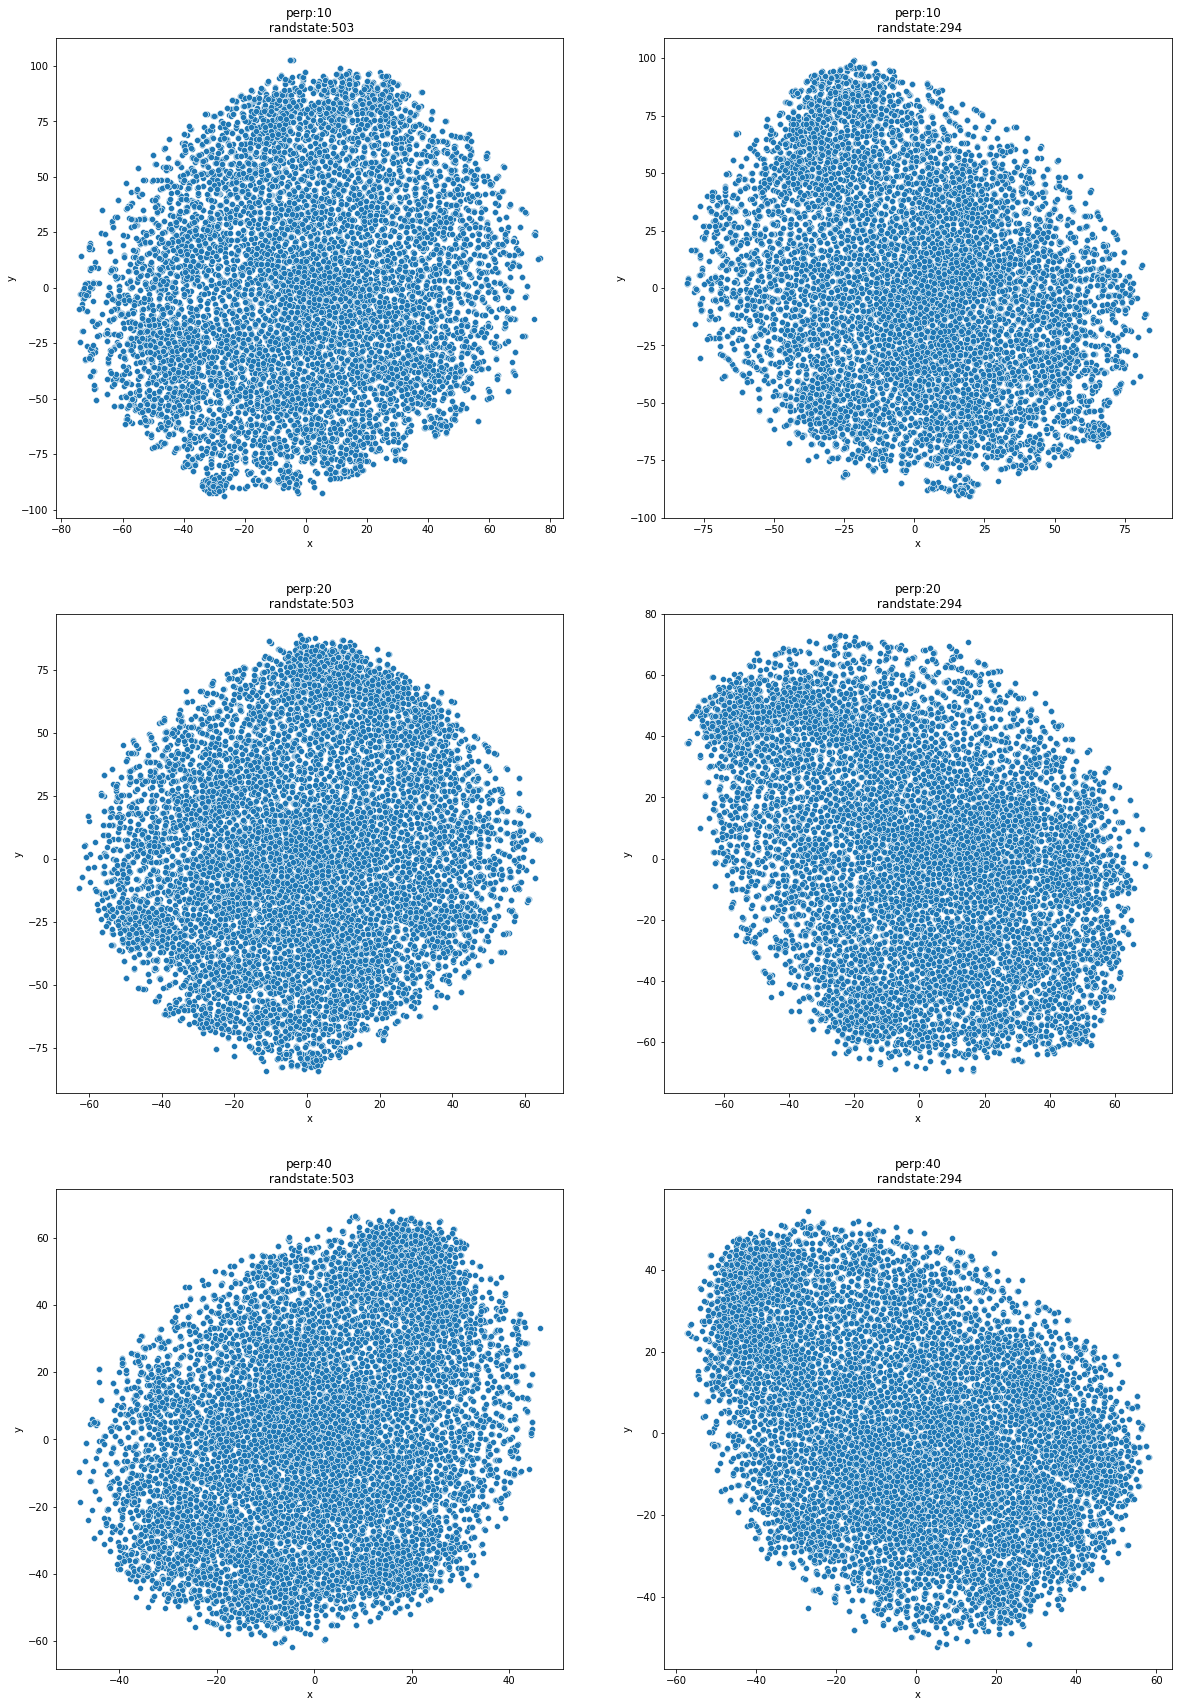

In [2]:
# Get data
df = pd.read_csv("../Data/NSI/narcissistic_personality_inventory.csv",index_col=0)

perplexity_values = [10,20,40]
randState_values = [503,294]
fig, ax = plt.subplots(3,2,figsize=(20,30))
df_tsne_plots = np.zeros((3,2),dtype="O")
for i in range(3):
    for j in range(2):
        # Get projected data
        df_proj = TSNE(perplexity=perplexity_values[i],
                       random_state=randState_values[j],
                       metric="hamming",
                       square_distances=True).fit_transform(df)
        df_proj = pd.DataFrame(df_proj,columns=["x","y"])
        df_tsne_plots[i,j] = df_proj.copy()
        # Plot on ax
        sns.scatterplot(x="x",
                        y="y",
                        data=df_proj,
                        ax=ax[i,j])
        print(f"Plot {i*2+j} done")
        ax[i,j].set_title(f"perp:{perplexity_values[i]}\n randstate:{randState_values[j]}")
plt.savefig("TSNE_nsi")

The above graph tells us this dataset may not be clusterable. However the tsne plot may be giving bad results due to many discrete features.

# Run model

In [3]:
num_classes = 4
random_state = 100
max_iter = 300
burn_in = 100

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=burn_in,
                               max_iter=max_iter)


# fit the data to the model
print(f"\nRunning {max_iter} iterations...",end="")
start_time = time.time()
C_list.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {round(total_time,5)} (secs)")

# Get parameter estimates
theta, pi, k = C_list.get_params()

Data Size
---------
Samples: 11243
Features: 40

Running 300 iterations...DONE!
Total time: 285.63105 (secs)


# Print Parameters

## Pi

In [4]:
# pi = pd.DataFrame(pi)
# pi.columns = ["Probability"]
# pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
# display(pi)
k

array([1, 0, 2, ..., 0, 3, 1], dtype=int64)

## Theta

In [5]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 31,Item 32,Item 33,Item 34,Item 35,Item 36,Item 37,Item 38,Item 39,Item 40
Cluster 0,0.408755,0.059072,0.059950,0.023414,0.201965,0.135719,0.078140,0.346844,0.188743,0.276747,...,0.192985,0.067926,0.176285,0.134743,0.053061,0.013483,0.146143,0.026427,0.160245,0.135757
Cluster 1,0.775393,0.171357,0.141172,0.126358,0.562408,0.436666,0.267413,0.688813,0.506694,0.760981,...,0.466971,0.480997,0.694122,0.333878,0.307974,0.262875,0.269232,0.047749,0.506573,0.465803
Cluster 2,0.908363,0.575691,0.429168,0.605726,0.855788,0.832594,0.723014,0.896878,0.874099,0.899249,...,0.826264,0.798543,0.871113,0.730335,0.760689,0.671160,0.597712,0.485170,0.814202,0.890666
Cluster 3,0.599499,0.278491,0.216537,0.213723,0.384053,0.398808,0.467811,0.682480,0.613108,0.416852,...,0.464366,0.192290,0.387254,0.383802,0.256024,0.092384,0.421188,0.240944,0.372123,0.552927


## K

In [6]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,1
Subject 2,0
Subject 3,2
Subject 4,2
Subject 5,0
...,...
Subject 11239,0
Subject 11240,3
Subject 11241,0
Subject 11242,3


## Class Membership

In [7]:
memebership = C_list.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Subject 1,1.109271e-06,0.994828,3.365813e-04,4.834299e-03
Subject 2,9.986330e-01,0.000025,1.147924e-16,1.342536e-03
Subject 3,3.543497e-17,0.000342,9.996573e-01,7.690103e-07
Subject 4,6.359332e-20,0.000007,9.999928e-01,4.442609e-08
Subject 5,9.983721e-01,0.001605,1.489470e-16,2.312854e-05
...,...,...,...,...
Subject 11239,9.999972e-01,0.000002,5.938313e-22,3.204254e-07
Subject 11240,7.360228e-02,0.000202,2.906154e-12,9.261960e-01
Subject 11241,9.949686e-01,0.000100,7.073136e-16,4.931667e-03
Subject 11242,1.192775e-01,0.264617,6.031890e-09,6.161055e-01


With a score of .968 the clusters are almost equivalent. This gives us strong evidence the algorithm is able to accurately cluster the subjects.

# Analyze Convergence

## Thetas

(299, 4, 40)


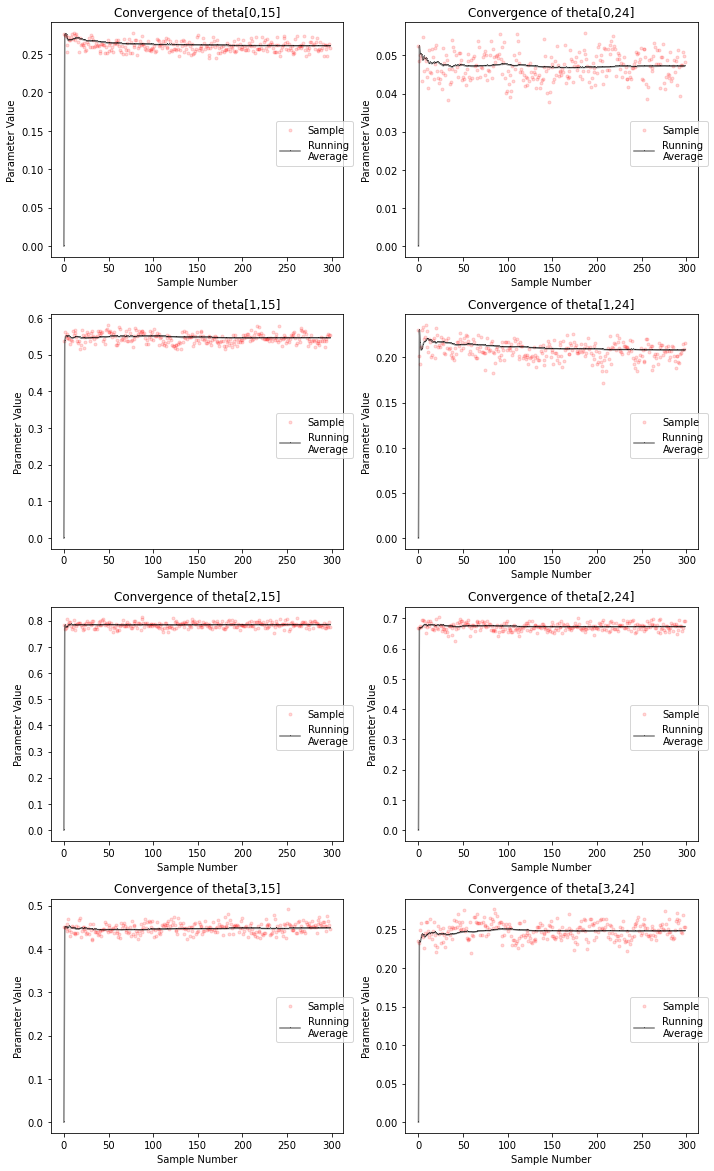

In [8]:
np.random.RandomState(100)
number_of_rows = 5
number_of_cols = 2
samples_theta_params = C_list.samples_theta_params
print(samples_theta_params.shape)

# Get random indexes
c_range = [0,1,2,3]
j_range = np.random.choice(np.arange(0,samples_theta_params.shape[2]),number_of_cols)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    for j in j_range:
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(1,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample, c, j])

        plt.subplot(number_of_rows,number_of_cols,num_plot)
        # Plot samples
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.15)
        # Plot running avg
        plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
        
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

## k

(299, 11243)


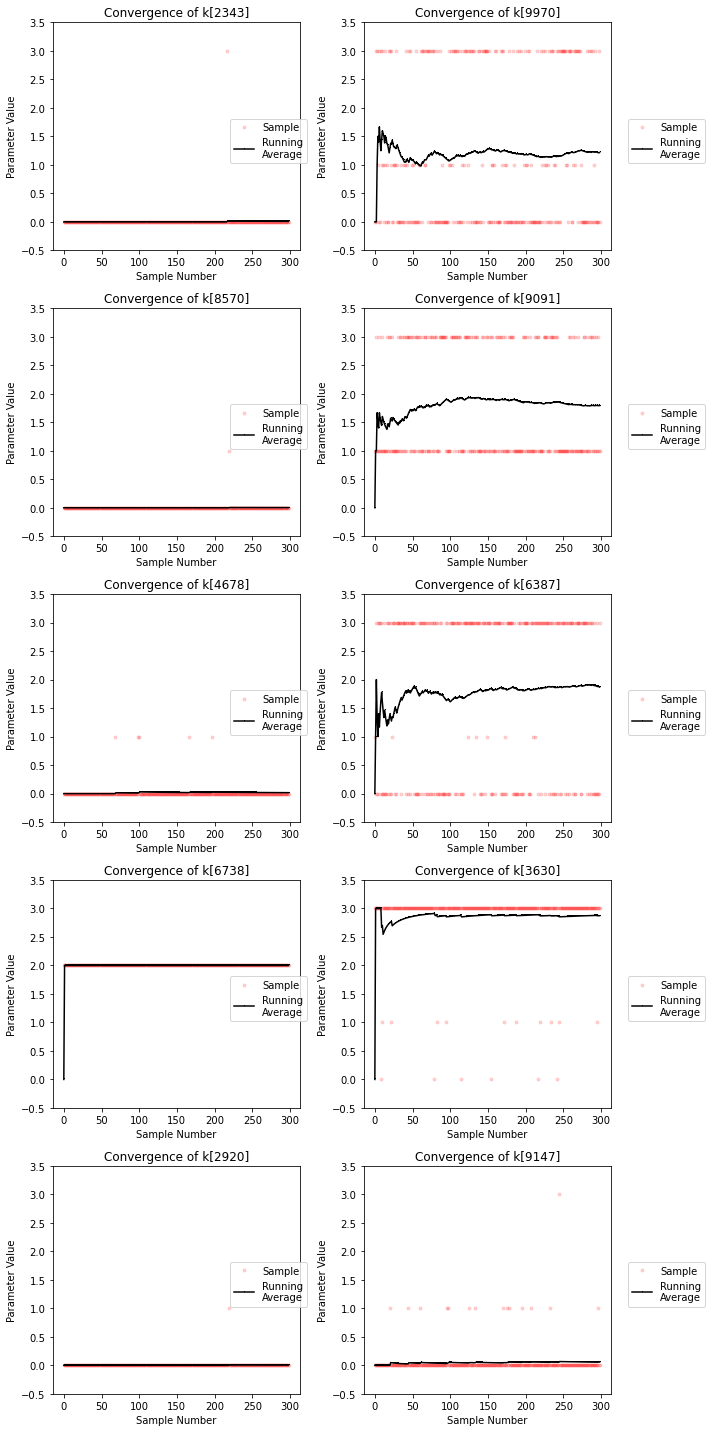

In [ ]:
samples_class_assignments = C_list.samples_class_assignments
print(samples_class_assignments.shape)

# Get random indexes
i_range = np.random.choice(np.arange(0,samples_class_assignments.shape[1]),number_of_cols*number_of_rows)

plt.figure(figsize=(10,20))
num_plot = 1
for i in i_range:
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(1,samples_class_assignments.shape[0]):
        running_avg[num_sample] = np.average(samples_class_assignments[:num_sample, i])

    plt.subplot(number_of_rows,number_of_cols,num_plot,alpha=.5)
    # Plot samples
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(-.5,3.5)
    num_plot += 1
plt.tight_layout()

## pi

(299, 4)


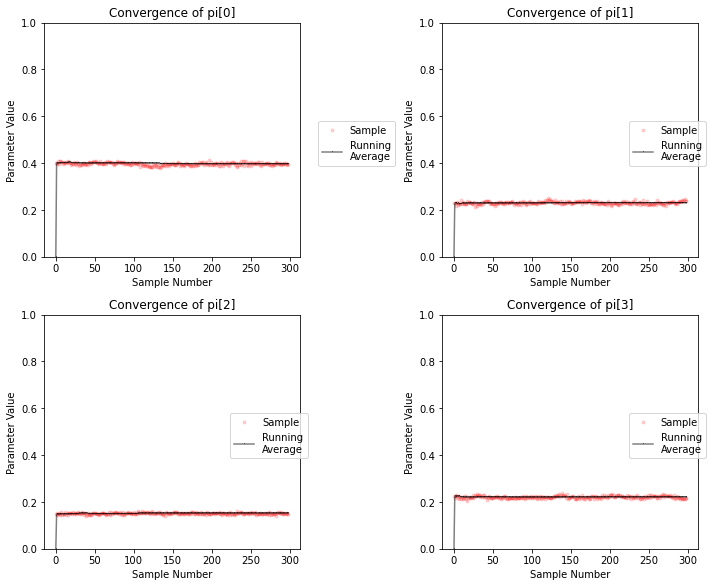

In [ ]:
samples_class_probabilities = C_list.samples_class_probabilities
print(samples_class_probabilities.shape)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(1,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample, c])

    plt.subplot(number_of_rows,number_of_cols,num_plot)
    # Plot samples
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(0,1)
    num_plot += 1
plt.tight_layout()

# Monte Carlo Simulations

## Running simulations

In [ ]:
num_simulations = 50
mc_samples_theta = []
mc_samples_pi = []
mc_samples_k = []
mc_samples_true_k = []
mc_samples_assignments = []
mc_samples_times = []

for num_sim in range(num_simulations):
    # Sample new data
    mc_data, mc_k = C_list.resample(11243)
    
    # Set up model
    C_temp = MixtureModelBernoulli(num_classes=num_classes,
                                   random_state=random_state,
                                   burn_in=burn_in,
                                   max_iter=max_iter)

    # fit the data to the model
    print(f"\nRunning simulation {num_sim}/{num_simulations}...",end="")
    start_time = time.time()
    C_temp.fit(mc_data)
    total_time = time.time() - start_time
    print("DONE!")
    print(f"Total time: {round(total_time,5)} (secs)")
    
    # Append simulation data
    theta_temp, pi_temp, k_temp = C_temp.get_params()
    mc_samples_theta.append(theta_temp)
    mc_samples_pi.append(pi_temp)
    mc_samples_k.append(k_temp)
    mc_samples_true_k.append(mc_k)
    mc_samples_assignments.append(C_temp.get_class_membership_scores())
    mc_samples_times.append(total_time)


Running simulation 0/50...DONE!
Total time: 291.90933 (secs)

Running simulation 1/50...DONE!
Total time: 288.02709 (secs)

Running simulation 2/50...DONE!
Total time: 291.46958 (secs)

Running simulation 3/50...DONE!
Total time: 289.54785 (secs)

Running simulation 4/50...DONE!
Total time: 291.67825 (secs)

Running simulation 5/50...DONE!
Total time: 290.00238 (secs)

Running simulation 6/50...DONE!
Total time: 291.99681 (secs)

Running simulation 7/50...DONE!
Total time: 288.91601 (secs)

Running simulation 8/50...DONE!
Total time: 291.17675 (secs)

Running simulation 9/50...DONE!
Total time: 288.92623 (secs)

Running simulation 10/50...DONE!
Total time: 2473.23017 (secs)

Running simulation 11/50...DONE!
Total time: 328.73812 (secs)

Running simulation 12/50...DONE!
Total time: 321.79229 (secs)

Running simulation 13/50...DONE!
Total time: 332.81958 (secs)

Running simulation 14/50...DONE!
Total time: 327.45445 (secs)

Running simulation 15/50...DONE!
Total time: 301.9946 (secs)

R